# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.101 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x '/content/drive/MyDrive/Temp/areaDetection/damage leaf area.zip' '/content/data/'

In [ ]:
!unzip '/content/drive/MyDrive/Temp/areaDetection/damage leaf area.zip' -d '/content/data/'

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/data/data.yaml epochs=20 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 70.4MB/s]
Ultralytics YOLOv8.0.101 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/data/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/segment/train2/weights/best.pt')
results = model.predict(source='/content/drive/MyDrive/Temp/52525.png', conf=0.25)
annotated_frame = results[0].plot()
# cv2_imshow( annotated_frame)

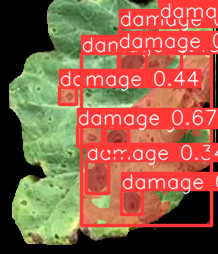

In [ ]:
from google.colab.patches import cv2_imshow

annotated_frame = results[0].plot()
cv2_imshow( annotated_frame)

In [ ]:
res = results[0].orig_img

In [ ]:
for i in range(1, len(results[0].masks)):
    mask += (results[0].masks.data[i].cpu().numpy() * 255).astype("uint8")

In [ ]:
mask = (results[0].masks.data[3].cpu().numpy() * 255).astype("uint8")

In [ ]:
import cv2
import numpy as np

In [ ]:
mask = cv2.resize(mask, (res.shape[1], res.shape[0]))

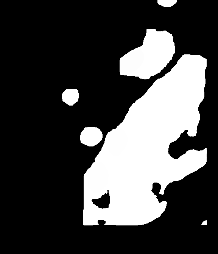

In [ ]:
cv2_imshow(mask)

In [ ]:
num_white_pixels = np.sum(mask == 255)
num_black_pixels = np.sum(mask == 0)

# Calculate the total number of pixels
total_pixels = mask.shape[0] * mask.shape[1]


print(f"Total number of pixels: {total_pixels}")
print(f"Number of white pixels: {num_white_pixels}")
print(f"Number of black pixels: {num_black_pixels}")

print(f'total leaf area: {num_white_pixels/total_pixels*100} %')

Total number of pixels: 55372
Number of white pixels: 39361
Number of black pixels: 15691
total leaf area: 71.08466372896048 %


In [ ]:
replaced_image = cv2.bitwise_and(res,res,mask = mask)

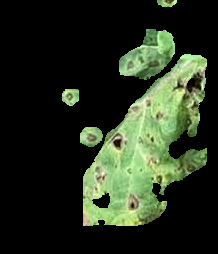

In [ ]:
cv2_imshow(replaced_image)